In [1]:
from keras.layers import Input,Dense, Conv2D, MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as k

/home/jugs/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [72]:
input_img = Input(shape=(28,28,1))

x = Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

In [73]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [74]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 16)          0         
__________

In [91]:
from keras.datasets import mnist
import numpy as np

In [92]:
(x_train,_),(x_test,_) = mnist.load_data()

In [93]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test), 28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [94]:
from keras.callbacks import TensorBoard

In [95]:
autoencoder.fit(x_train,x_train, epochs=50, batch_size=128,
               shuffle=True, validation_data=(x_test,x_test),
               callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 36s - loss: 0.1404 - val_loss: 0.1355
Epoch 2/50
60000/60000 [==============================] - 36s - loss: 0.1385 - val_loss: 0.1369
Epoch 3/50
60000/60000 [==============================] - 37s - loss: 0.1369 - val_loss: 0.1324
Epoch 4/50
60000/60000 [==============================] - 39s - loss: 0.1353 - val_loss: 0.1358
Epoch 5/50
60000/60000 [==============================] - 39s - loss: 0.1336 - val_loss: 0.1303
Epoch 6/50
60000/60000 [==============================] - 39s - loss: 0.1323 - val_loss: 0.1327
Epoch 7/50
60000/60000 [==============================] - 39s - loss: 0.1311 - val_loss: 0.1269
Epoch 8/50
60000/60000 [==============================] - 39s - loss: 0.1297 - val_loss: 0.1277
Epoch 9/50
60000/60000 [==============================] - 39s - loss: 0.1286 - val_loss: 0.1238
Epoch 10/50
60000/60000 [==============================] - 40s - loss: 0.1277 - val_lo

In [96]:
import matplotlib.pyplot as plt

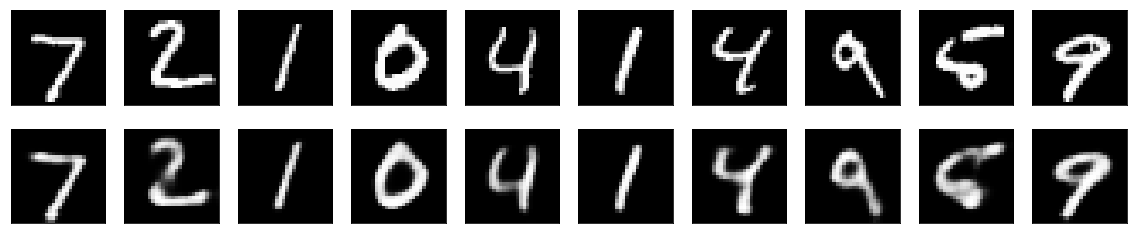

In [97]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [88]:
encoded_imgs= autoencoder.predict(x_test)
# n = 10
# plt.figure(figsize=(20, 8))
# for i in range(n):
#     ax = plt.subplot(1, n, i+1)
#     plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()